This Jupyter notebook focuses on performing analytics operations on insurance database that uses below mentioned parameters:  
| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float  

Main objectives are:  
Clean the data, take care of blank entries  
Run EDA, identify attributes that most affect the charges  
Develop Simple Linear Regression models and Multiple Linear regression models for predicting charges  
Use Ridge regression to refine the performance of Linear Regression models  


In [191]:
# Importing all required libraries through the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

In [172]:
# Loading the data
data = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(data, header = None)
df.columns= ['age','gender','bmi','no_of_children','smoker','region','charges']
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [173]:
df.replace('?',np.NaN,inplace=True)
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


PERFORMING DATA WRANGLING

In [174]:
# First of all I will evaluate for mising data in each and every column
missing_data = df.isnull()
missing_data.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [175]:
# Now I am going to apply a for loop to find out number of entries missing in each column
# Iterate through columns and print the count of missing values for each column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')
        

age
age
False    2768
True        4
Name: count, dtype: int64

gender
gender
False    2772
Name: count, dtype: int64

bmi
bmi
False    2772
Name: count, dtype: int64

no_of_children
no_of_children
False    2772
Name: count, dtype: int64

smoker
smoker
False    2765
True        7
Name: count, dtype: int64

region
region
False    2772
Name: count, dtype: int64

charges
charges
False    2772
Name: count, dtype: int64



In [176]:
# age is a continous variable - so I will replace missing values with mean of the column
avg_age = df['age'].astype(float).mean()
df['age'].replace(np.NaN,avg_age, inplace =True)
# smoker is categorical variable - so I will replace with more frequent value
more_frequent_smoker = df['smoker'].mode()
df['smoker'].replace(np.NaN, 0, inplace=True)

In [177]:
# Bringing decimal places of price column to 2 digits
df[['charges']] = np.round(df[['charges']],2)
df[['charges']]

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
2767,8569.86
2768,2020.18
2769,16450.89
2770,21595.38


PERFORMING EXPLORATORY DATA ANALYSIS 

<Axes: xlabel='bmi', ylabel='charges'>

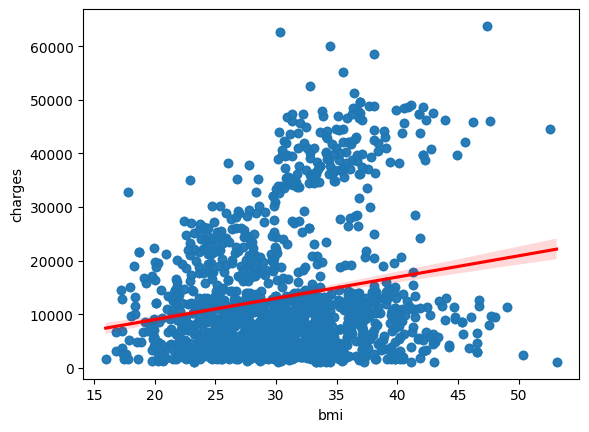

In [178]:
# Implementing regression plot for charges with respect to bmi
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})


<Axes: xlabel='smoker', ylabel='charges'>

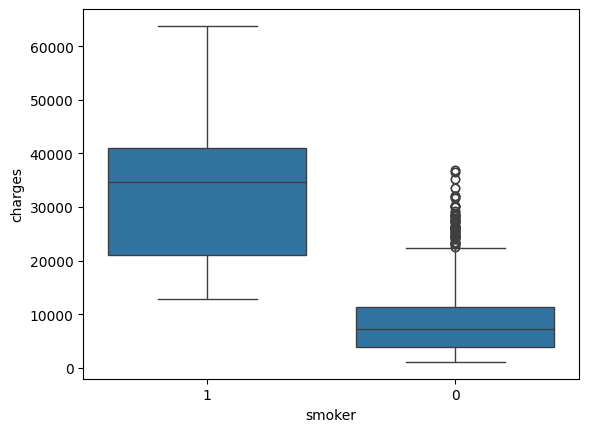

In [179]:
# charges with respect to smoker
sns.boxplot(x="smoker", y="charges", data=df)


MODEL DEVELOPMENT

In [180]:
# Fit a linear regression model that may be used to predict charges, by just using all attributes except smoker
# Print R2
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504063768213818


In [181]:
# With one variable 'smoker'
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))


0.6221791733924185


In [182]:
# Create a training PIPELINE that uses StandardScaler(), PolynomialFeatures(), LinearRegression
# to create a model that can predict charges using all other attributes of data
# There should be even further improvement in performance

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [183]:
P= df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
Y= df[['charges']]
pipe.fit(P,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [185]:
ypipe = pipe.predict(P)
ypipe[0:4]


array([[23842.25],
       [ 2828.  ],
       [ 5262.  ],
       [ 4560.25]])

In [188]:
r2_score(Y,ypipe)

0.8452541888320907

MODEL REFINEMENT

In [201]:
#Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

x_data = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
y_data = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.20,random_state =1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 555
number of training samples: 2217


In [202]:
# Initialize a RIdge Regressor that used hyperparameter alpha = 0.1
# Fit the model using training data subset
# Print R2 score for testing data 
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760802462837336


In [204]:
# Appply polynomial transformation to training parameteres with degree 2
# Apply these transformed features set to same regression model and print R2 for testing subset
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835630578755342
